In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

bernoulli_model = CmdStanModel(stan_file = 'bern_1.stan')
bern_fit = bernoulli_model.sample(data = 'bern_1.data.json')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


(array([ 22.,  97., 175., 302., 418., 457., 458., 452., 420., 330., 272.,
        228., 147.,  94.,  61.,  41.,  15.,   8.,   2.,   1.]),
 array([0.0341623 , 0.07413393, 0.11410557, 0.1540772 , 0.19404884,
        0.23402048, 0.27399211, 0.31396374, 0.35393538, 0.39390701,
        0.43387865, 0.47385028, 0.51382192, 0.55379355, 0.59376519,
        0.63373682, 0.67370846, 0.71368009, 0.75365173, 0.79362336,
        0.833595  ]),
 <BarContainer object of 20 artists>)

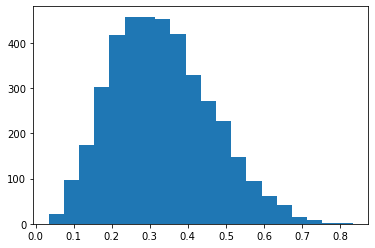

In [23]:
theta = bern_fit.stan_variable('theta')
plt.hist(theta, bins=20)

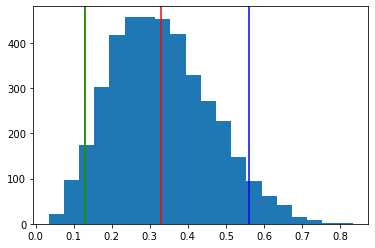

In [33]:
summary = bern_fit.summary()
summary = summary.iloc[1]
plt.hist(theta, bins=20)
plt.axvline(summary['Mean'], color='r')
plt.axvline(summary['StdDev'], color='y')
plt.axvline(summary['5%'], color='g')
plt.axvline(summary['95%'], color='b')
plt.show()